###Lenguajes seleccionados: Java, Python, C#, C++

In [1]:
# -*- coding: utf-8 -*-

#lectura de datos 

import json
dataset_path = "dataset-230415-11.56.txt"
data = []
f = open(dataset_path, "r")
for line in f:
	try:
		tweet = json.loads(line)
		data.append(tweet)
	except Exception as ex:
		#print("Error :", ex)
		continue
print(len(data))
f.close()
import pandas as pd
tweets = pd.DataFrame()
tweets['text'] = [t['text'] for t in data]
#TODO: change lang by language at new reload
tweets['language'] = [t['lang'] for t in data]
tweets['country'] = [t['place']['country'] if t['place'] else None for t in data]

# function to search keyword programming languag in text
import re
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word+" ", text)
    if match:
        return True
    return False

# En la columna text de nuestro DataFrame buscamos las ocurrencias de cada palabra a analizar 
# ... Incluir posible grafico
#TODO: #java #python #javascript
tweets['python'] = tweets['text'].apply(lambda tweet: word_in_text('python', tweet))
tweets['java'] = tweets['text'].apply(lambda tweet: word_in_text('java', tweet))
tweets['javascript'] = tweets['text'].apply(lambda tweet: word_in_text('javascript', tweet))

# Contabilizando 
print (tweets['python'].value_counts()[True])
print (tweets['java'].value_counts()[True])
print (tweets['javascript'].value_counts()[True])

tweets_by_prg_lang_count1 = (tweets['python'].value_counts()[True], tweets['java'].value_counts()[True], tweets['javascript'].value_counts()[True])
#prg_langs = ('python', 'java', 'javascript')
# diccionario para describir mejor los datos de los lenguajes de programación durante
# la búsqueda en el dataset
proglangs = {'python':'python', 'java':'java', 'javascript':'javascript'}
x = list(range(len(proglangs)))

1598
355
812
23


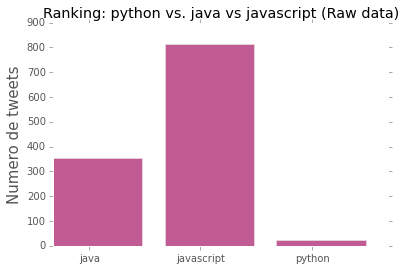

In [17]:
# Plotting
#import matplotlib.pyplot as plt
%matplotlib inline
#revisar 
import matplotlib.pyplot as plt
fig, axis =  plt.subplots()
plt.bar(x, tweets_by_prg_lang_count1, 0.8, alpha=1, color='#C15B93')

axis.set_ylabel('Numero de tweets', fontsize=15)
axis.set_title('Ranking: python vs. java vs javascript (Raw data)')
axis.set_xticks([p + 0.4 * 0.8 for p in x])
axis.set_xticklabels(list(proglangs.keys()))
plt.style.use('ggplot')
plt.grid()

Ahora vamos a focalizarnos en tweets  que tengan que ver más con lenguajes de programación en sí, seleccionando por ejemplo aquellos tweets que contengan las palabras clave: "programming" o "programacion" teniendo cuidado además de las tildes

In [4]:
tweets["programming"] = tweets['text'].apply(lambda t: word_in_text('programming',t))
tweets["programación"] = tweets['text'].apply(lambda t: word_in_text('programación',t))
tweets["programacion"] = tweets['text'].apply(lambda t: word_in_text('programacion',t))
tweets["relevante"] = tweets['text'].apply(lambda t: word_in_text('programming',t) 
                                            or word_in_text('programación',t)
                                            or word_in_text('programacion',t))

In [5]:
#Nos quedamos solo con los tweets relevantes
tweets = tweets[tweets["relevante"] == True]
tweets[:5]

,text,language,country,python,java,javascript,programming,programación,programacion,relevante
26,Developing Scalable Apps in #Python\nwith #Goo...,en,None,False,False,False,True,False,False,True
66,RT @devbattles: How I Learned to Stop Worrying...,en,None,True,False,False,True,False,False,True
110,RT @imissyouoa: #linux Qt Creator 3.4 Brings C...,en,None,False,False,False,True,False,False,True
149,Deal! Learn for $49 Only: Step By Step Java Pr...,en,None,False,True,False,True,False,False,True
179,@_ruunyan I WAS TALKING ABOUT THE PROGRAMMING ...,en,None,True,False,False,True,False,False,True


Ahora podemos observar que la cantidad de tweets relevantes, relacionados con temas de programación,
entre java y python difieren únicamente en uno

In [6]:
###print (tweets[tweets['relevante'] == True]['python'].value_counts()[True])
###print (tweets[tweets['relevante'] == True]['java'].value_counts()[True])
###print (tweets[tweets['relevante'] == True]['javascript'].value_counts()[True])
print (tweets['python'].value_counts()[True])
print (tweets['java'].value_counts()[True])
print (tweets['javascript'].value_counts()[True])

10
11
1


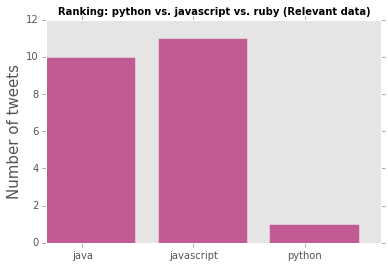

In [18]:
tweets_by_prg_lang_count = [tweets[tweets['relevante'] == True]['python'].value_counts()[True], 
                      tweets[tweets['relevante'] == True]['java'].value_counts()[True], 
                      tweets[tweets['relevante'] == True]['javascript'].value_counts()[True]]
x_pos = list(range(len(proglangs)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_prg_lang_count, width,alpha=1,color='#C15B93')
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: python vs. javascript vs. ruby (Relevant data)', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(list(proglangs.keys()))
plt.grid()

In [8]:
tweets_by_prg_lang_count[:10]

[10, 11, 1]

In [8]:
#TODO: tweets['programming'==True or 'programacion'==True]
#tweets['programming'].value_counts()[True]
#tweets['programming'].value_counts().get(True,0)
# Se necesita prevenir el caso en el que no existan datos para las palabras clave buscadas
#tweets['programación'].value_counts().get(True,0)

Filtramos los lenguajes del texto  para el posterior análisis sentimental, error 'aux'

In [9]:
###aux = tweets
tweets = tweets[(tweets.language == 'es') | (tweets.language == 'en')]

In [10]:
tweets[:10]

,text,language,country,python,java,javascript,programming,programación,programacion,relevante
26,Developing Scalable Apps in #Python\nwith #Goo...,en,None,False,False,False,True,False,False,True
66,RT @devbattles: How I Learned to Stop Worrying...,en,None,True,False,False,True,False,False,True
110,RT @imissyouoa: #linux Qt Creator 3.4 Brings C...,en,None,False,False,False,True,False,False,True
149,Deal! Learn for $49 Only: Step By Step Java Pr...,en,None,False,True,False,True,False,False,True
179,@_ruunyan I WAS TALKING ABOUT THE PROGRAMMING ...,en,None,True,False,False,True,False,False,True
250,i cant do this java programming i quit,en,None,False,True,False,True,False,False,True
302,Deal! Learn for $10 Only: Intro to Java Progra...,en,None,False,True,False,True,False,False,True
397,Qt Creator 3.4 Brings C++ Programming Improvem...,en,None,False,False,False,True,False,False,True
440,Most shared #python #math #programming #statis...,en,None,True,False,False,True,False,False,True
468,Java Swing GUI Programming Lesson 7 List Boxes...,en,None,False,True,False,True,False,False,True


##Preparación de la data para el análisis sentimental

Por cada lenguaje de programación que se desea analizar creamos un diccionario con los datos
necesarios para enviar al analizador sentimental. 
**Creando a la final un diccionario personalizado conteniendo principalmente los datos formateados como cadenas de acuerdo a como lo solicita el analizador sentiment140 **

In [11]:
insentiments = dict()
for proglang in proglangs.keys():
    # En español
    chunk_es = tweets[(tweets[proglang] == True) & (tweets.language == 'es')]
    chunk_es = chunk_es.ix[:,['text']]
    chunk_es['query'] = proglang
    insentiments[proglang] = {'es': '{"language": "es", "data": %s }' % 
                            chunk_es.to_json(orient='records')}
    # Enn inglés
    chunk_en = tweets[(tweets[proglang] == True) & (tweets.language == 'en')]
    chunk_en = chunk_en.ix[:,['text']]
    chunk_en['query'] = proglang
    # ojo: no se reemplaza el contenido del diccionario sino que se agrega
    insentiments[proglang].update({'en': '{"language": "en", "data": %s }' % 
                            chunk_en.to_json(orient='records')})

###La estructura final de insentiment:

In [ ]:
{
  "java": {
    "es": "{\"language\": \"es\", \"data\": [...] }",
    "en": "{\"language\": \"en\", \"data\": [...] }",
        },
  "python": {
    "es": "{\"language\": \"es\", \"data\": [...] }",
    "en": "{\"language\": \"en\", \"data\": [...] }",
        },
  "javascript": {
    "es": "{\"language\": \"es\", \"data\": [...] }",
    "en": "{\"language\": \"en\", \"data\": [...] }",
        },
}        

###La estructura de el campo "data"

In [37]:
{"text" : " ... ", "query" : "java"}

{'query': 'java', 'text': ' ... '}

##Análisis Sentimental con la aplicación "Sentiment140"

In [12]:
def parse_response(json_response):
    # obviamos los valores neutrales
    negative_tweets, positive_tweets = 0, 0
    for t in json_response["data"]:
        if int(t["polarity"]) == 0:
            negative_tweets += 1
        elif int(t["polarity"]) == 4:
            positive_tweets += 1
    return negative_tweets, positive_tweets

In [13]:
#La version del articulo de Fernando Marengo  usa urllib2
#intentamos en nuestra version usar algo mas moderno para enviar la data en formato
#JSON directamente en vez de transformarlo a str

#import urllib2
import requests
URL_SENTIMENT140 = "http://www.sentiment140.com/api/bulkClassifyJson"
###req = urllib.request.http.client.Request(URL_SENTIMENT140)
###req.add_header('Content-Type', 'application/json')
###response = urllib2.urlopen(req, str(result))
outsentiments = dict()
sentiments = pd.DataFrame(columns=['Programming','Language', 'negative', 'positive'])
for proglang in insentiments.keys():
    response = requests.post(URL_SENTIMENT140, insentiments[proglang]['es'])
    polarity = parse_response(response.json())
    sentiments.loc[len(sentiments)] = [proglang, 'es', polarity[0], polarity[1]]
    #es = dict()
    #es['negative'], es['positive'] = parse_response(response.json())
    #outsentiments[proglang] = {'es': es}
    response = requests.post(URL_SENTIMENT140, insentiments[proglang]['en'])
    polarity = parse_response(response.json())
    sentiments.loc[len(sentiments)] = [proglang, 'en', polarity[0], polarity[1]]
    #en = dict()
    #en['negative'], en['positive'] = parse_response(response.json())
    # Ojo, no se reemplaza
    #outsentiments[proglang].update({'en' : en})

In [14]:
sentiments

,Programming,Language,negative,positive
0,java,es,0,0
1,java,en,2,2
2,javascript,es,0,0
3,javascript,en,0,1
4,python,es,0,0
5,python,en,0,4


###TODO: Realizar Análisis detenido de los resultados

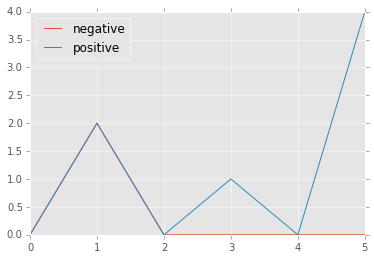

In [15]:
sentiments.plot()

http://text-processing.com/docs/sentiment.html 

## Analysis Sentimental con la apalicación text-processing (NLTK)


In [ ]:
#curl -d "text=\u6291\u3048\u304d\u308c\u306a\u3044 My soul \u304c\uff0c\u6291\u3048\u304d\u308c\u306a\u3044 Python \u306b\u805e\u3053\u3048\u308b" http://text-processing.com/api/sentiment/

The polarity values are: 
* 0: negative
* 2: neutral
* 4: positive